# Module 3: Régression
**Auteur:** Dr. Michel MAMA TOULOU, Expert en Intelligence Artificielle

## 3.1 Régression Linéaire

### Formulation mathématique

La régression linéaire est une méthode statistique utilisée pour modéliser la relation entre une variable dépendante (ou cible) et une ou plusieurs variables indépendantes (ou features). La forme la plus simple est la régression linéaire simple, où il n'y a qu'une seule variable indépendante.

L'équation de la régression linéaire simple est :

`y = β₀ + β₁x + ε`

où :
*   `y` est la variable dépendante.
*   `x` est la variable indépendante.
*   `β₀` est l'ordonnée à l'origine (intercept).
*   `β₁` est la pente (coefficient de régression).
*   `ε` est le terme d'erreur (résidu).

Pour la régression linéaire multiple, l'équation devient :

`y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε`

où :
*   `x₁, x₂, ..., xₙ` sont les variables indépendantes.
*   `β₁, β₂, ..., βₙ` sont les coefficients de régression associés à chaque variable indépendante.

### Hypothèses du modèle

La régression linéaire repose sur plusieurs hypothèses clés :

1.  **Linéarité :** La relation entre les variables indépendantes et la variable dépendante est linéaire.
2.  **Indépendance des erreurs :** Les erreurs (résidus) sont indépendantes les unes des autres.
3.  **Homoscédasticité :** La variance des erreurs est constante pour tous les niveaux des variables indépendantes.
4.  **Normalité des erreurs :** Les erreurs suivent une distribution normale.
5.  **Absence de multicolinéarité :** Les variables indépendantes ne sont pas fortement corrélées entre elles.

La violation de ces hypothèses peut affecter la validité des résultats de la régression.

### Solution analytique (moindres carrés)

La méthode des moindres carrés est utilisée pour estimer les coefficients de régression (β₀, β₁, ..., βₙ) en minimisant la somme des carrés des erreurs (résidus).

La fonction à minimiser est :

`SSE = Σ (yᵢ - ŷᵢ)²`

où :
*   `yᵢ` est la valeur observée de la variable dépendante pour l'observation i.
*   `ŷᵢ` est la valeur prédite de la variable dépendante pour l'observation i.

La solution analytique pour la régression linéaire simple est :

`β₁ = Σ [(xᵢ - x̄)(yᵢ - ȳ)] / Σ [(xᵢ - x̄)²]`
`β₀ = ȳ - β₁x̄`

où :
*   `x̄` est la moyenne des valeurs de la variable indépendante.
*   `ȳ` est la moyenne des valeurs de la variable dépendante.

Pour la régression linéaire multiple, la solution est obtenue en utilisant l'algèbre matricielle.

### Interprétation des coefficients

Les coefficients de régression (β₀, β₁, ..., βₙ) représentent l'effet de chaque variable indépendante sur la variable dépendante, en maintenant toutes les autres variables constantes.

*   `β₀` (ordonnée à l'origine) est la valeur prédite de la variable dépendante lorsque toutes les variables indépendantes sont égales à zéro.
*   `β₁` est la variation de la variable dépendante pour une augmentation d'une unité de la variable indépendante x₁, en maintenant toutes les autres variables constantes.

L'interprétation des coefficients dépend de l'échelle des variables et du contexte du problème.

### Diagnostics du modèle

Les diagnostics du modèle sont utilisés pour vérifier si les hypothèses de la régression linéaire sont satisfaites et pour identifier les problèmes potentiels avec le modèle.

Les diagnostics courants comprennent :

*   **Analyse des résidus :** Vérification de la normalité, de l'homoscédasticité et de l'indépendance des résidus.
*   **Identification des valeurs aberrantes :** Détection des observations qui ont une influence disproportionnée sur le modèle.
*   **Vérification de la multicolinéarité :** Mesure de la corrélation entre les variables indépendantes.

### Analyse des résidus

L'analyse des résidus est une étape importante pour vérifier les hypothèses de la régression linéaire. Les résidus sont les différences entre les valeurs observées et les valeurs prédites.

Les graphiques de résidus courants comprennent :

*   **Graphique des résidus en fonction des valeurs prédites :** Utilisé pour vérifier l'homoscédasticité.
    *   [Homoscédasticité](https://i.stack.imgur.com/AVJ2R.png)
    *   [Hétéroscédasticité](https://i.stack.imgur.com/dt0qn.png)
*   **Histogramme des résidus :** Utilisé pour vérifier la normalité.
    *   [Distribution Normale des Résidus](https://i.imgur.com/sQogJpP.png)
*   **Graphique de séquence des résidus :** Utilisé pour vérifier l'indépendance.

Voici un exemple en Python utilisant `matplotlib` et `scikit-learn` :

Root Mean Squared Error: 0.9579943877557056
R² Score: 0.6521157503858556
y_test_min : 3.64124785891559, y_test_max : 9.790515184755742


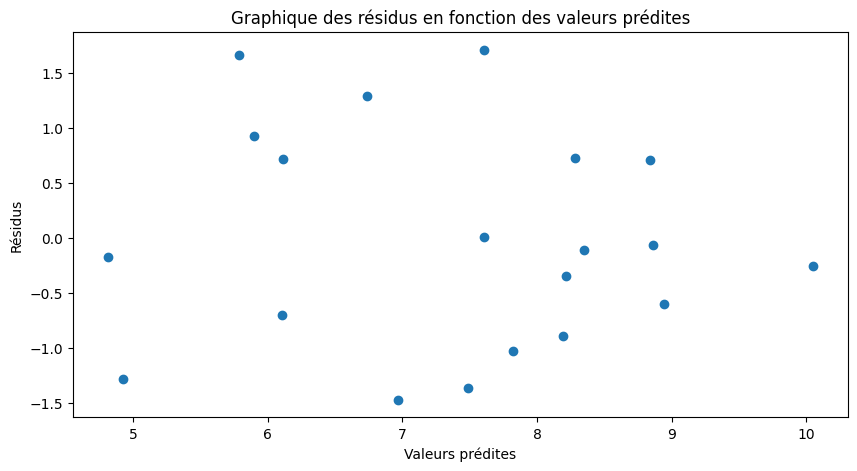

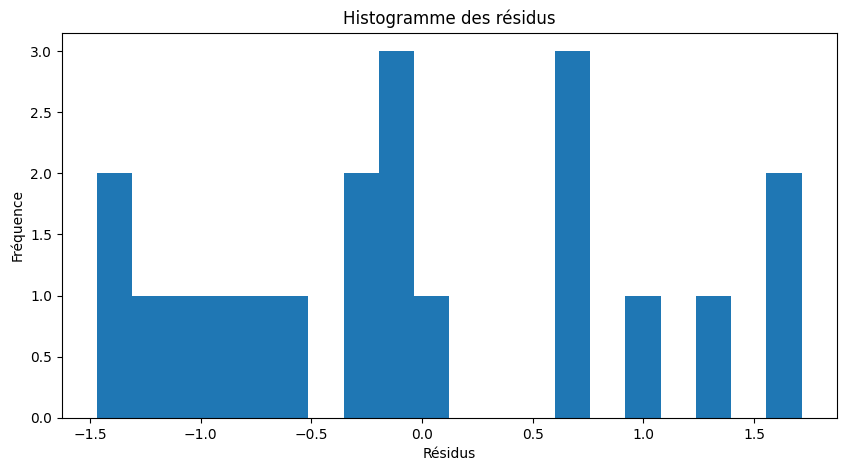

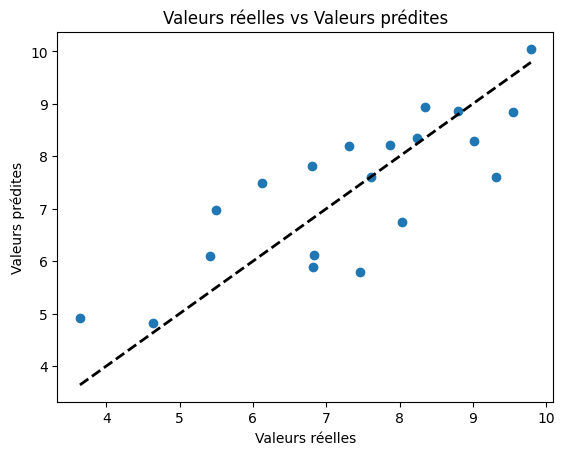

In [19]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\regression_methods.ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 01 Collecte de données
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # Normalisation des données d'entrée

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les résidus
residuals = y_test - y_pred
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {RMSE}")
r2_score_value = r2_score(y_test, y_pred)
print(f"R² Score: {r2_score_value}")
print(f'y_test_min : {y_test.min()}, y_test_max : {y_test.max()}')

# Graphique des résidus en fonction des valeurs prédites
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus en fonction des valeurs prédites")
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
# plt.vlines(0, xmin=min(residuals), xmax=max(residuals), colors='r', linestyles='dashed')
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.show()

plt.plot(y_test, y_pred, 'o')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs Valeurs prédites")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()  

### Tests d'hypothèses sur les coefficients

Les tests d'hypothèses sur les coefficients sont utilisés pour déterminer si les coefficients de régression sont statistiquement significatifs. L'hypothèse nulle est que le coefficient est égal à zéro (c'est-à-dire que la variable indépendante n'a pas d'effet sur la variable dépendante).

Les tests courants comprennent :

*   **Test t :** Utilisé pour tester l'hypothèse nulle pour chaque coefficient individuellement.
*   **Test F :** Utilisé pour tester l'hypothèse nulle que tous les coefficients sont égaux à zéro.

Les résultats des tests d'hypothèses sont généralement présentés sous forme de valeurs p, qui représentent la probabilité d'observer les résultats obtenus si l'hypothèse nulle est vraie. Si la valeur p est inférieure à un niveau de signification prédéterminé (par exemple, 0,05), l'hypothèse nulle est rejetée.

### Métriques d'évaluation pour la régression

Il existe plusieurs métriques pour évaluer la performance d'un modèle de régression. Voici quelques-unes des plus courantes, avec leurs formules, utilités, forces, faiblesses et quand les choisir :

*   **Résidus (Residuals):** La différence entre la valeur observée et la valeur prédite.
    *   **Formule:**  `eᵢ = yᵢ - ŷᵢ`
    *   **Utilité:** Permet d'analyser la distribution des erreurs et de vérifier les hypothèses du modèle.
    *   **Forces:** Fournit une vue détaillée des erreurs individuelles.
    *   **Faiblesses:** Difficile à synthétiser en une seule métrique.
    *   **Quand choisir:** Toujours utile pour un diagnostic approfondi du modèle.
    *   [Exemple de Résidus](https://i.ytimg.com/vi/kqWL4NPqWpE/maxresdefault.jpg)

*   **Erreur Absolue Moyenne (MAE - Mean Absolute Error):** La moyenne des valeurs absolues des erreurs.
    *   **Formule:**  `MAE = (1/n) * Σ|yᵢ - ŷᵢ|`
    *   **Utilité:** Mesure la magnitude moyenne des erreurs, sans tenir compte de leur direction.
    *   **Forces:** Facile à interpréter et robuste aux valeurs aberrantes.
    *   **Faiblesses:** Ne pénalise pas fortement les grandes erreurs.
    *   **Quand choisir:** Lorsque les valeurs aberrantes sont présentes et que l'on souhaite une métrique moins sensible à ces valeurs.

*   **Erreur Quadratique Moyenne (MSE - Mean Squared Error):** La moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.
    *   **Formule:**  `MSE = (1/n) * Σ(yᵢ - ŷᵢ)²`
    *   **Utilité:** Mesure la précision globale du modèle.
    *   **Forces:** Simple à calculer et largement utilisée. Pénalise les grandes erreurs.
    *   **Faiblesses:** Sensible aux valeurs aberrantes en raison de la mise au carré des erreurs.
    *   **Quand choisir:** Lorsque l'on souhaite pénaliser fortement les grandes erreurs.

*   **Racine Carrée de l'Erreur Quadratique Moyenne (RMSE - Root Mean Squared Error):** La racine carrée de la MSE.
    *   **Formule:**  `RMSE = √(MSE) = √((1/n) * Σ(yᵢ - ŷᵢ)²) `
    *   **Utilité:** Mesure la précision du modèle dans les mêmes unités que la variable cible.
    *   **Forces:** Facile à interpréter et sensible aux grandes erreurs.
    *   **Faiblesses:** Sensible aux valeurs aberrantes.
    *   **Quand choisir:** Lorsque l'on souhaite une métrique sensible aux grandes erreurs et exprimée dans les mêmes unités que la variable cible.

*   **Erreur Quadratique Logarithmique Moyenne (MSLE - Mean Squared Logarithmic Error):** La moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles, après avoir appliqué une transformation logarithmique.
    *   **Formule:** `MSLE = (1/n) * Σ(log(1 + yᵢ) - log(1 + ŷᵢ))²`
    *   **Utilité:** Utile lorsque la variable cible a une distribution asymétrique et que l'on souhaite réduire l'impact des grandes valeurs.
    *   **Forces:** Moins sensible aux valeurs aberrantes que MSE et RMSE.
    *   **Faiblesses:** Ne peut être utilisée que pour des valeurs positives.
    *   **Quand choisir:** Lorsque la variable cible a une distribution asymétrique et que l'on souhaite réduire l'impact des grandes valeurs.

*   **Racine Carrée de l'Erreur Quadratique Logarithmique Moyenne (RMSLE - Root Mean Squared Logarithmic Error):** La racine carrée de la MSLE.
    *   **Formule:** `RMSLE = √(MSLE) = √((1/n) * Σ(log(1 + yᵢ) - log(1 + ŷᵢ))²)`
    *   **Utilité:** Similaire à MSLE, mais exprimée dans les mêmes unités que la variable cible transformée.
    *   **Forces:** Moins sensible aux valeurs aberrantes que RMSE.
    *   **Faiblesses:** Ne peut être utilisée que pour des valeurs positives.
    *   **Quand choisir:** Lorsque la variable cible a une distribution asymétrique, que l'on souhaite réduire l'impact des grandes valeurs, et que l'on souhaite une métrique exprimée dans les mêmes unités que la variable cible transformée.

*   **Erreur Absolue en Pourcentage Moyenne (MAPE - Mean Absolute Percentage Error):** La moyenne des valeurs absolues des erreurs en pourcentage.
    *   **Formule:** `MAPE = (1/n) * Σ(|(yᵢ - ŷᵢ) / yᵢ|) * 100`
    *   **Utilité:** Facile à interpréter en termes de pourcentage d'erreur.
    *   **Forces:** Indépendante de l'échelle de la variable cible.
    *   **Faiblesses:** Ne peut pas être utilisée si la variable cible contient des valeurs nulles. Sensible aux petites valeurs de la variable cible.
    *   **Quand choisir:** Lorsque l'on souhaite une métrique facile à interpréter en termes de pourcentage d'erreur et que la variable cible ne contient pas de valeurs nulles.

*   **Coefficient de Détermination (R²):** La proportion de la variance de la variable cible expliquée par le modèle.
    *   **Formule:** `R² = 1 - (SSE / SST)`, où SSE est la somme des carrés des erreurs et SST est la somme des carrés totale.
    *   **Utilité:** Mesure la qualité de l'ajustement du modèle aux données.
    *   **Forces:** Facile à interpréter et indépendante de l'échelle de la variable cible.
    *   **Faiblesses:** Peut être trompeur en cas de relations non linéaires ou de valeurs aberrantes. Ne tient pas compte de la complexité du modèle.
    *   **Quand choisir:** Pour évaluer la proportion de variance expliquée par le modèle, mais avec prudence.

*   **R² Ajusté:** Une version modifiée du R² qui tient compte du nombre de variables indépendantes dans le modèle.
    *   **Formule:** `R²_adj = 1 - [(1 - R²) * (n - 1) / (n - k - 1)]`, où n est le nombre d'observations et k est le nombre de variables indépendantes.
    *   **Utilité:** Évite la surinterprétation du R² en pénalisant l'ajout de variables non significatives.
    *   **Forces:** Plus précis que le R² pour comparer des modèles avec différents nombres de variables.
    *   **Faiblesses:** Peut être difficile à interpréter.
    *   **Quand choisir:** Pour comparer des modèles avec différents nombres de variables indépendantes, en privilégiant la parcimonie.

Le choix de la métrique dépend du problème spécifique et des propriétés des données. Il est souvent utile d'utiliser plusieurs métriques pour évaluer la performance d'un modèle de régression.

## 3.2 Extensions de la Régression

### Régression Ridge et Lasso

La régression Ridge et Lasso sont des extensions de la régression linéaire qui ajoutent une pénalité aux coefficients de régression pour éviter le surapprentissage (overfitting).

*   **Régression Ridge (L2) :** Ajoute une pénalité proportionnelle à la somme des carrés des coefficients.
*   **Régression Lasso (L1) :** Ajoute une pénalité proportionnelle à la somme des valeurs absolues des coefficients.

La régression Lasso a la propriété de pouvoir mettre certains coefficients à zéro, ce qui permet de réaliser une sélection de variables.

### Régularisation L2 et L1

La régularisation L2 (Ridge) et L1 (Lasso) sont des techniques utilisées pour réduire la complexité d'un modèle et éviter le surapprentissage.

*   **Régularisation L2 :** Ajoute une pénalité proportionnelle à la somme des carrés des coefficients. Elle réduit l'amplitude des coefficients, mais ne les met généralement pas à zéro.
*   **Régularisation L1 :** Ajoute une pénalité proportionnelle à la somme des valeurs absolues des coefficients. Elle peut mettre certains coefficients à zéro, ce qui permet de réaliser une sélection de variables.

Voici un exemple en Python utilisant `scikit-learn` :

R² Linear Regression: 0.8180844822762487
MSE Linear Regression: 0.8121631051716927
R² Ridge: 0.8191235368478953
MSE Ridge: 0.8075242387467142
R² Lasso: 0.7904182614344677
MSE Lasso: 0.9356791422221867
R² Random Forest: 0.7132244562809871
MSE Random Forest: 1.2803114269109168
R² Gradient Boosting: 0.7174780914005866
MSE Gradient Boosting: 1.2613210430765511
y_test_min : 2.1406441241398664, y_test_max : 10.819267109216854


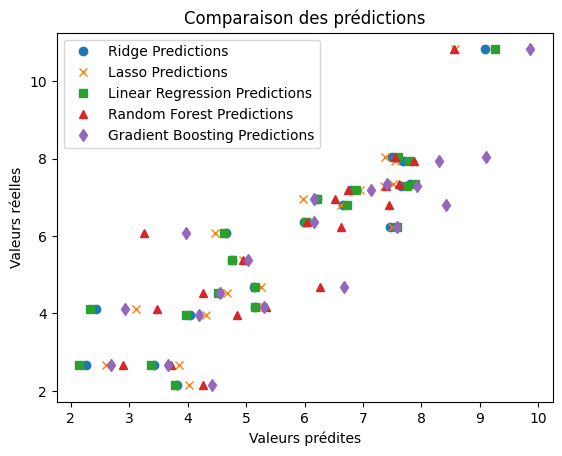

In [33]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\regression_methods.ipynb
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires pour l'exemple
np.random.seed(0)
X = 2 * np.random.rand(100, 5)
y = 4 + 3 * X[:, 0] - 1.5 * X[:, 1] + np.random.randn(100)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression Linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_reg = lr.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)
print(f"R² Linear Regression: {r2_reg}")
print("MSE Linear Regression:", mse_reg)

# Régression Ridge
ridge_model = Ridge(alpha=1.0)  # alpha est le paramètre de régularisation
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Ridge: {r2_ridge}")
print("MSE Ridge:", mse_ridge)

# Régression Lasso
lasso_model = Lasso(alpha=0.1)  # alpha est le paramètre de régularisation
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² Lasso: {r2_lasso}")
print("MSE Lasso:", mse_lasso)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Random Forest: {r2_rf}")
print("MSE Random Forest:", mse_rf)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R² Gradient Boosting: {r2_gb}")
print("MSE Gradient Boosting:", mse_gb)

print(f'y_test_min : {y_test.min()}, y_test_max : {y_test.max()}')


plt.plot(y_pred_ridge, y_test, 'o', label='Ridge Predictions')
plt.plot(y_pred_lasso, y_test, 'x', label='Lasso Predictions')
plt.plot(y_pred_reg, y_test, 's', label='Linear Regression Predictions')
plt.plot(y_pred_rf, y_test, '^', label='Random Forest Predictions')
plt.plot(y_pred_gb, y_test, 'd', label='Gradient Boosting Predictions')
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Comparaison des prédictions")
plt.legend()
plt.show()  




### Sélection de variables

La sélection de variables est le processus de sélection d'un sous-ensemble de variables indépendantes pertinentes pour un modèle de régression. Elle peut être utilisée pour simplifier le modèle, réduire le temps de calcul, et améliorer la performance.

Les méthodes de sélection de variables comprennent :

*   **Sélection basée sur des critères statistiques :** Utilisation de tests d'hypothèses ou de critères d'information (par exemple, AIC, BIC) pour sélectionner les variables.
*   **Sélection basée sur la régularisation :** Utilisation de la régression Lasso pour mettre certains coefficients à zéro et sélectionner les variables correspondantes.
*   **Méthodes de recherche :** Utilisation d'algorithmes de recherche (par exemple, forward selection, backward elimination) pour explorer différentes combinaisons de variables.

### Régression logistique

La régression logistique est une méthode statistique utilisée pour modéliser la probabilité d'un événement binaire (c'est-à-dire une variable dépendante qui peut prendre deux valeurs, par exemple 0 ou 1).

L'équation de la régression logistique est :

`p = 1 / (1 + e^(-z))`

où :
*   `p` est la probabilité de l'événement.
*   `e` est la base du logarithme naturel.
*   `z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ` est une combinaison linéaire des variables indépendantes.

### Fonction sigmoïde

La fonction sigmoïde (ou fonction logistique) est une fonction mathématique qui prend une valeur réelle en entrée et renvoie une valeur comprise entre 0 et 1. Elle est utilisée dans la régression logistique pour transformer une combinaison linéaire des variables indépendantes en une probabilité.

La fonction sigmoïde est définie comme :

`σ(z) = 1 / (1 + e^(-z))`

où :
*   `z` est une valeur réelle.
*   `e` est la base du logarithme naturel.

Voici un exemple en Python utilisant `matplotlib` et `numpy` :

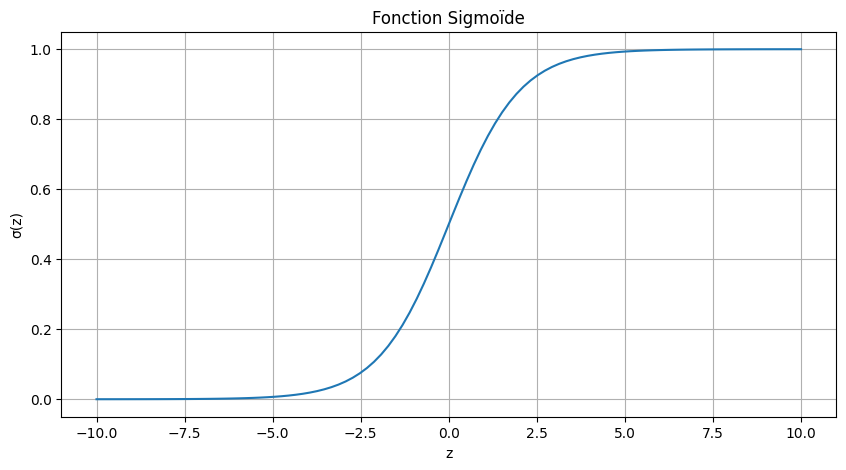

In [21]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\regression_methods.ipynb
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Générer des valeurs pour z
z = np.linspace(-10, 10, 100)

# Calculer les valeurs de la fonction sigmoïde
sigma_z = sigmoid(z)

# Afficher la fonction sigmoïde
plt.figure(figsize=(10, 5))
plt.plot(z, sigma_z)
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Fonction Sigmoïde")
plt.grid(True)
plt.show()

### Interprétation des odds ratios

Les odds ratios sont utilisés pour interpréter les coefficients de la régression logistique. L'odds ratio est le rapport des chances de succès sur les chances d'échec.

L'odds ratio pour une variable indépendante xᵢ est défini comme :

`OR = e^(βᵢ)`

où :
*   `βᵢ` est le coefficient de régression associé à la variable indépendante xᵢ.

L'interprétation de l'odds ratio est la suivante :

*   Si OR > 1, une augmentation d'une unité de la variable indépendante augmente les chances de succès.
*   Si OR < 1, une augmentation d'une unité de la variable indépendante diminue les chances de succès.
*   Si OR = 1, la variable indépendante n'a pas d'effet sur les chances de succès.

## Liens utiles pour la documentation

*   **Scikit-learn :** [https://scikit-learn.org/stable/modules/linear_model.html](https://scikit-learn.org/stable/modules/linear_model.html)
*   **Statsmodels :** [https://www.statsmodels.org/stable/regression.html](https://www.statsmodels.org/stable/regression.html)
*   **Matplotlib :** [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
*   **Numpy :** [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)

MAE: 2.7454
MSE: 8.8674
RMSE: 2.9778
MSLE: 0.204519
RMSLE: 0.452238
MAPE (%): 64.351
R²: -0.9862


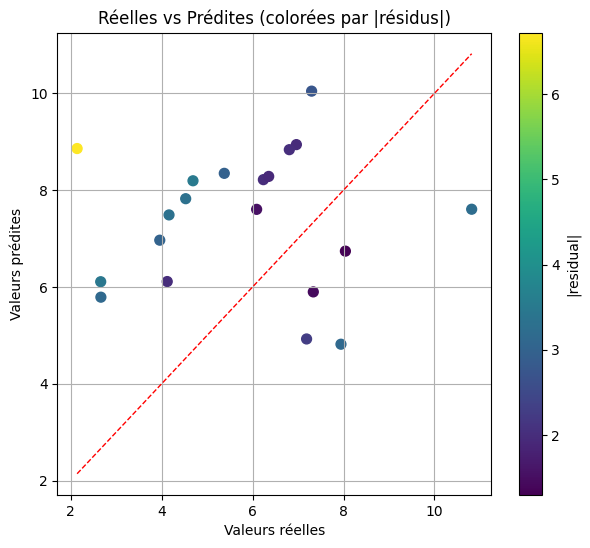

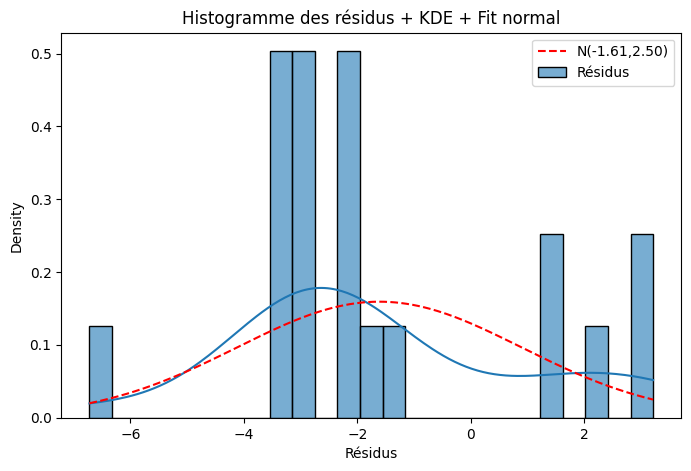

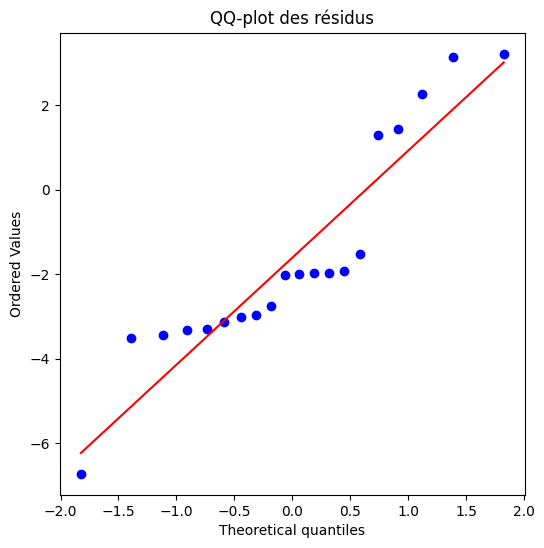

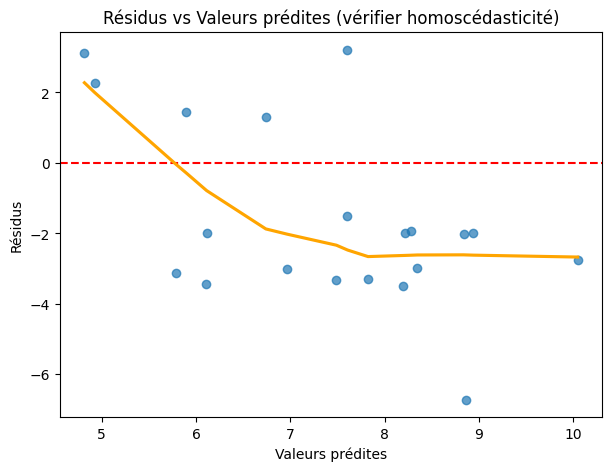

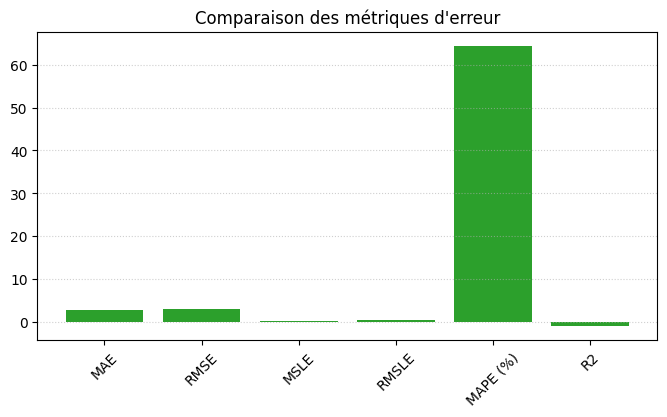

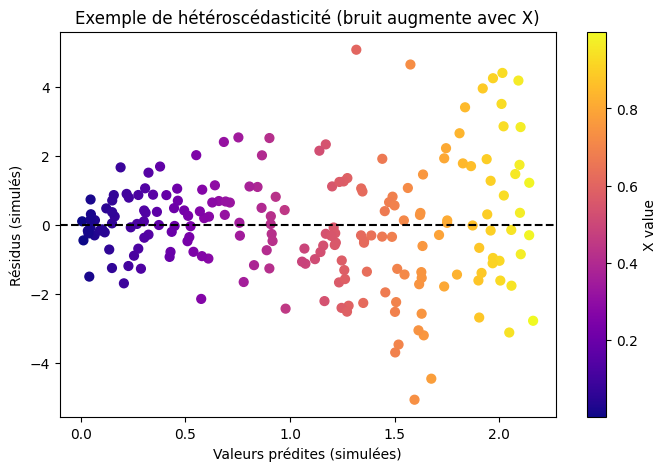

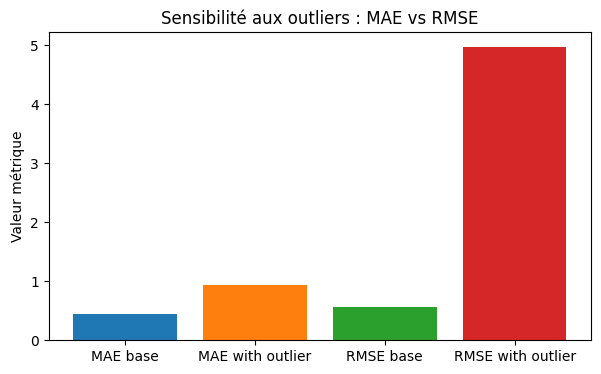

In [22]:
# Imports for visual diagnostics of errors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    mean_absolute_percentage_error,
    r2_score,
)
from sklearn.linear_model import LinearRegression

# simulate some data if needed
try:
    y_true = y_test.flatten()
    y_pred = y_pred.flatten()
except Exception:
    # fallback simulation (will show visuals)
    rng = np.random.RandomState(0)
    X = 2 * rng.rand(100, 1)
    y_true = (4 + 3 * X[:, 0] + rng.randn(100)).astype(float)
    model = LinearRegression().fit(X, y_true)
    y_pred = model.predict(X)

residuals = y_true - y_pred
abs_res = np.abs(residuals)

# Metrics (safe MSLE: ensure non-negative)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
# MSLE/RMSLE: avoid negative/zero issues by clipping at -1e-9 and using log1p
def safe_msle(y_true_arr, y_pred_arr):
    yt = np.maximum(y_true_arr, 0.0)
    yp = np.maximum(y_pred_arr, 0.0)
    return mean_squared_log_error(yt, yp)
msle = safe_msle(y_true, y_pred)
rmsle = np.sqrt(msle)
# MAPE: handle zeros by tiny epsilon
eps = 1e-9
mape = np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + eps))) * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSLE: {msle:.6f}")
print(f"RMSLE: {rmsle:.6f}")
print(f"MAPE (%): {mape:.3f}")
print(f"R²: {r2:.4f}")

# 1) Scatter y_true vs y_pred colored by abs residual
plt.figure(figsize=(7,6))
sc = plt.scatter(y_true, y_pred, c=abs_res, cmap='viridis', s=50)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=1)
plt.colorbar(sc, label='|residual|')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Réelles vs Prédites (colorées par |résidus|)')
plt.grid(True)
plt.show()

# 2) Residuals histogram + KDE + normal fit
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, stat='density', bins=25, color='C0', alpha=0.6, label='Résidus')
# Normal fit
mu, std = stats.norm.fit(residuals)
xs = np.linspace(residuals.min(), residuals.max(), 200)
plt.plot(xs, stats.norm.pdf(xs, mu, std), 'r--', label=f'N({mu:.2f},{std:.2f})')
plt.xlabel('Résidus')
plt.title('Histogramme des résidus + KDE + Fit normal')
plt.legend()
plt.show()

# 3) QQ-plot for normality of residuals
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot des résidus')
plt.show()

# 4) Residuals vs Predicted (check homoscedasticity)
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
# add lowess smoothing line if seaborn available
try:
    sns.regplot(x=y_pred, y=residuals, lowess=True, scatter=False, line_kws={'color':'orange'})
except Exception:
    pass
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs prédites (vérifier homoscédasticité)')
plt.show()

# 5) Bar chart summarizing metrics
metrics = {'MAE': mae, 'RMSE': rmse, 'MSLE': msle, 'RMSLE': rmsle, 'MAPE (%)': mape, 'R2': r2}
plt.figure(figsize=(8,4))
names = list(metrics.keys())
vals = [metrics[n] for n in names]
# plot with log scale for error comparision if wide range
plt.bar(names, vals, color='C2')
plt.xticks(rotation=45)
plt.title('Comparaison des métriques d\'erreur')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

# 6) Heteroscedasticity demo (simulate & visualize)
rng = np.random.RandomState(1)
X_sim = rng.rand(200)
noise = (0.5 + 2.0 * X_sim) * rng.randn(200)   # noise increases with X => heteroscedastic
y_sim = 2.0 * X_sim + noise
model_sim = LinearRegression().fit(X_sim.reshape(-1,1), y_sim)
y_sim_pred = model_sim.predict(X_sim.reshape(-1,1))
res_sim = y_sim - y_sim_pred

plt.figure(figsize=(8,5))
plt.scatter(y_sim_pred, res_sim, c=X_sim, cmap='plasma', s=40)
plt.colorbar(label='X value')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Valeurs prédites (simulées)')
plt.ylabel('Résidus (simulés)')
plt.title('Exemple de hétéroscédasticité (bruit augmente avec X)')
plt.show()

# 7) Outlier sensitivity demo: compare MAE vs RMSE with outlier
# base data
rng = np.random.RandomState(2)
y_base = rng.normal(loc=10.0, scale=1.0, size=100)
y_pred_base = y_base + rng.normal(scale=0.5, size=100)
# add a big outlier
y_base_out = y_base.copy()
y_base_out[0] += 50.0  # large outlier

mae_base = mean_absolute_error(y_base, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_base, y_pred_base))
mae_out = mean_absolute_error(y_base_out, y_pred_base)
rmse_out = np.sqrt(mean_squared_error(y_base_out, y_pred_base))

plt.figure(figsize=(7,4))
plt.bar(['MAE base','MAE with outlier','RMSE base','RMSE with outlier'], [mae_base, mae_out, rmse_base, rmse_out], color=['C0','C1','C2','C3'])
plt.title('Sensibilité aux outliers : MAE vs RMSE')
plt.ylabel('Valeur métrique')
plt.show()

# End of diagnostics cell